<a href="https://colab.research.google.com/github/AugustvonMackensen/AI_colab/blob/main/mnist_number_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[1] Import the package

In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras import datasets
from tensorflow.keras import Sequential, optimizers, callbacks
from tensorflow.keras.layers import Flatten, Dense

[2] Define the accuracy and function to visualize loss function

In [2]:
def plot_metric(h, metric):
  train_history = h.history[metric]
  val_history = h.history['val_'+metric]
  epochs = range(1, len(train_history)+1)
  plt.plot(epochs, train_history)
  plt.plot(epochs, val_history)
  plt.legend(['training '+metric, 'validation '+metric])
  plt.title('Training and validation ' + metric)
  plt.xlabel('Epochs')
  plt.ylabel(metric)
  plt.show()

[3] Load the Data and Normalization

In [3]:
# Load Image and labels for Training and test
(train_imgs, train_labels), (test_imgs, test_labels) = datasets.mnist.load_data()

# Normalize the pixel from 0 to 1
train_imgs, test_imgs = train_imgs / 255.0, test_imgs / 255.0


[4] Feed-Foward Network

In [4]:
model = Sequential([Flatten(input_shape=(28, 28)),
                    Dense(128, activation='sigmoid'),
                    Dense(10, activation='softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


[5] Comile the Model

In [5]:
#Compile the model
model.compile(optimizer=optimizers.SGD(0.1, momentum=0.9),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

[6] Fitting the Model

In [6]:
hist = model.fit(train_imgs, train_labels, epochs=50, validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 9s 3ms/step - loss: 0.3090 - accuracy: 0.9047 - val_loss: 0.1649 - val_accuracy: 0.9541
Epoch 2/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1385 - accuracy: 0.9581 - val_loss: 0.1203 - val_accuracy: 0.9646
Epoch 3/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0962 - accuracy: 0.9714 - val_loss: 0.1049 - val_accuracy: 0.9690
Epoch 4/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0723 - accuracy: 0.9779 - val_loss: 0.0985 - val_accuracy: 0.9702
Epoch 5/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0564 - accuracy: 0.9834 - val_loss: 0.0916 - val_accuracy: 0.9720
Epoch 6/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0447 - accuracy: 0.9865 - val_loss: 0.0860 - val_accuracy: 0.9743
Epoch 7/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0348 - accuracy: 0.9900 - val_loss: 0.0873 - val_accuracy:

# Visualize the loss function and accuracy

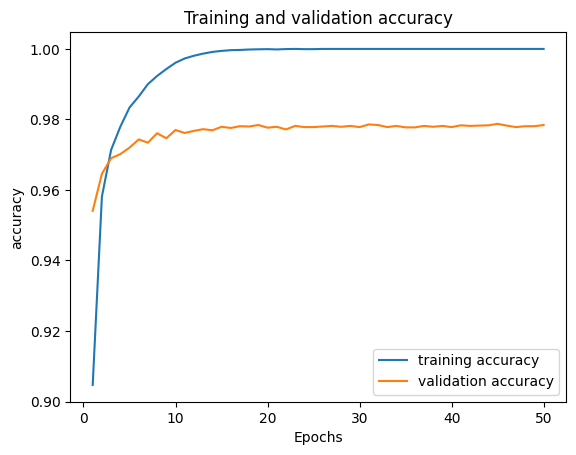

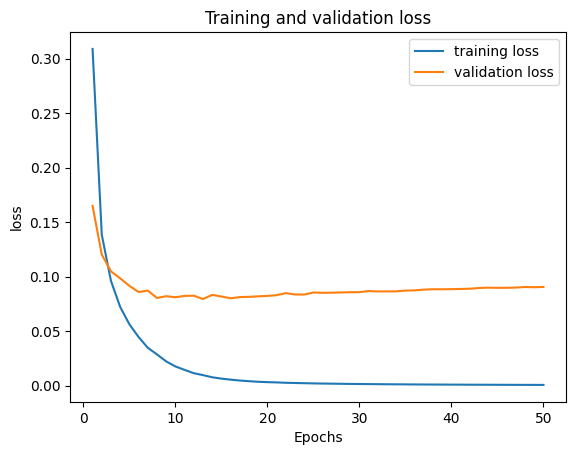

In [7]:
# Visualize
plot_metric(hist, 'accuracy')
plot_metric(hist, 'loss')

[8] Print recognition rate

In [8]:
#Print recognition rate for train sets
_, train_acc = model.evaluate(train_imgs, train_labels)
print('Trainset recognition rate :', train_acc)

#Print recognition rate for test sets
_, test_acc = model.evaluate(test_imgs, test_labels)
print('Testset Recognition rate : ', test_acc)

1875/1875 [==============================] - 5s 2ms/step - loss: 0.0187 - accuracy: 0.9957
Trainset recognition rate : 0.9956833124160767
313/313 [==============================] - 1s 2ms/step - loss: 0.0827 - accuracy: 0.9792
Testset Recognition rate :  0.979200005531311


[9] Model Fit for Early stopping

In [9]:
early_stop = callbacks.EarlyStopping(monitor='val_loss',
                                     min_delta=0,
                                     patience=10,
                                     verbose=1,
                                     restore_best_weights=True)

hist = model.fit(train_imgs, train_labels, epochs=50, callbacks=[early_stop]
                 ,validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 5s 3ms/step - loss: 7.6289e-04 - accuracy: 1.0000 - val_loss: 0.0908 - val_accuracy: 0.9783
Epoch 2/50
1500/1500 [==============================] - 5s 3ms/step - loss: 7.4288e-04 - accuracy: 1.0000 - val_loss: 0.0912 - val_accuracy: 0.9785
Epoch 3/50
1500/1500 [==============================] - 5s 4ms/step - loss: 7.2561e-04 - accuracy: 1.0000 - val_loss: 0.0915 - val_accuracy: 0.9778
Epoch 4/50
1500/1500 [==============================] - 5s 3ms/step - loss: 7.0992e-04 - accuracy: 1.0000 - val_loss: 0.0913 - val_accuracy: 0.9780
Epoch 5/50
1500/1500 [==============================] - 6s 4ms/step - loss: 6.8868e-04 - accuracy: 1.0000 - val_loss: 0.0917 - val_accuracy: 0.9783
Epoch 6/50
1500/1500 [==============================] - 5s 3ms/step - loss: 6.7557e-04 - accuracy: 1.0000 - val_loss: 0.0918 - val_accuracy: 0.9783
Epoch 7/50
1500/1500 [==============================] - 5s 3ms/step - loss: 6.6055e-04 - accuracy: 1.0000 - val_